> # **Preprocessing: Feature Engineering and Preprocessing for Predictive Models**
>
> The dataframe used in this notebook originates from the preprocessing steps performed in the
> notebook `"1_3b-preprocessing-handling-missing-values-and-variable-separation.ipynb"`
>
>Further refinement of the selected features is performed here in accordance with the project's aim to explore different approaches to the dataframe, in order to study the relationships that determine and help explain the behavior of the Electric Energy Consumption variable.

In [ ]:
# Importing Required Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from category_encoders import HashingEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Loading the Dataset

df = pd.read_csv("model_prediction_data.csv", index_col = 0, sep = ",")

In [3]:
df.head()

,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,erwltp,year,electric_range,fuel_consumption,specific_co2_emissions,innovative_technologies,fuel_type,fuel_mode,electric_energy_consumption
ID,,,,,,,,,,,,,
56003309,1710.0,1817.0,2487.0,131.0,0.0,2021,0.0,5.7,128.0,NonTech,petrol,H,0.0
56003313,1710.0,1817.0,2487.0,131.0,0.0,2021,0.0,5.7,128.0,NonTech,petrol,H,0.0
56003314,1710.0,1817.0,2487.0,131.0,0.0,2021,0.0,5.7,128.0,NonTech,petrol,H,0.0
56003351,1635.0,1749.0,1987.0,129.0,0.0,2021,0.0,7.1,160.0,NonTech,petrol,M,0.0
56003352,1635.0,1749.0,1987.0,129.0,0.0,2021,0.0,7.1,160.0,NonTech,petrol,M,0.0


In [ ]:
# Dataset Info Overview

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23687102 entries, 56003309 to 140000058
Data columns (total 12 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   mass_vehicle                 float64
 1   engine_capacity              float64
 2   engine_power                 float64
 3   erwltp                       float64
 4   year                         int64  
 5   electric_range               float64
 6   fuel_consumption             float64
 7   specific_co2_emissions       float64
 8   innovative_technologies      object 
 9   fuel_type                    object 
 10  fuel_mode                    object 
 11  electric_energy_consumption  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 2.3+ GB


In [ ]:
# Feature–Target Split

target = df["electric_energy_consumption"]
data = df.drop(["electric_energy_consumption"], axis = 1)

In [ ]:
# Detecting Categorical and Numerical Variables

categorical_cols = []
numerical_cols = []

for col in df.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

# Display categorized columns
print("\n📊 Numerical Variables:", numerical_cols)
print("\n🔠 Categorical Variables:", categorical_cols)


📊 Numerical Variables: ['mass_vehicle', 'weltp_test_mass', 'engine_capacity', 'engine_power', 'erwltp', 'year', 'electric_range', 'fuel_consumption', 'specific_co2_emissions', 'electric_energy_consumption']

🔠 Categorical Variables: ['innovative_technologies', 'fuel_type', 'fuel_mode']


> ## **Numerical Variables**

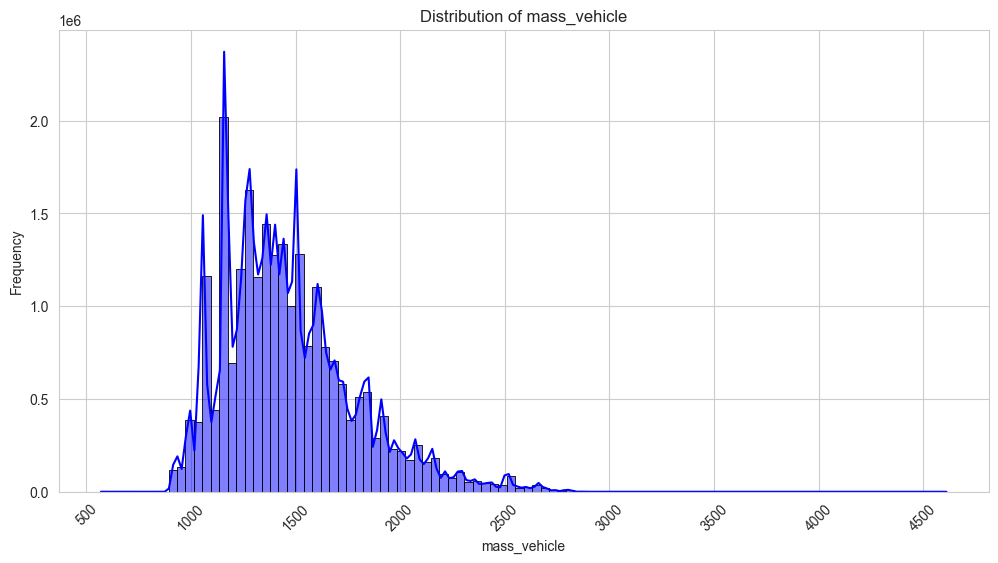

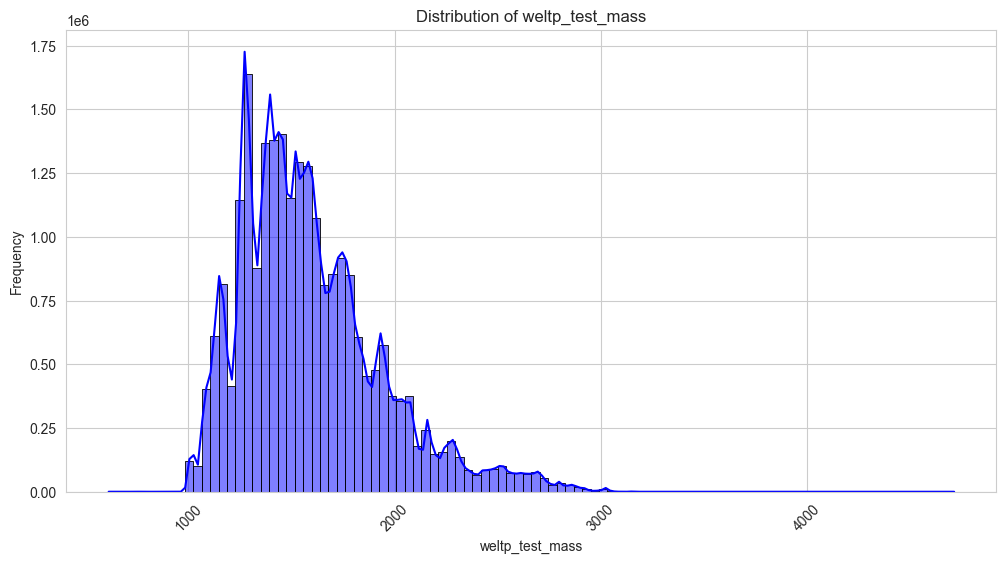

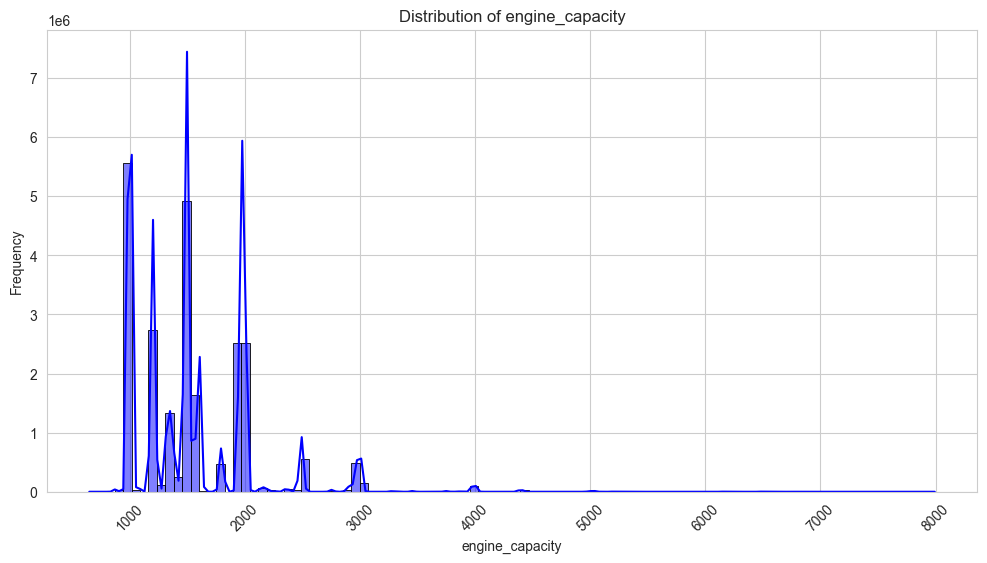

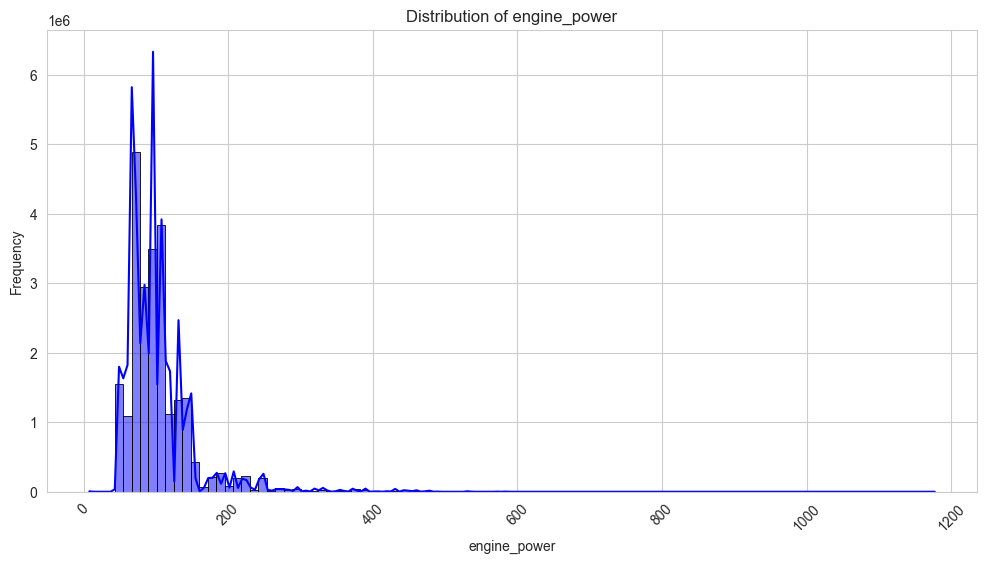

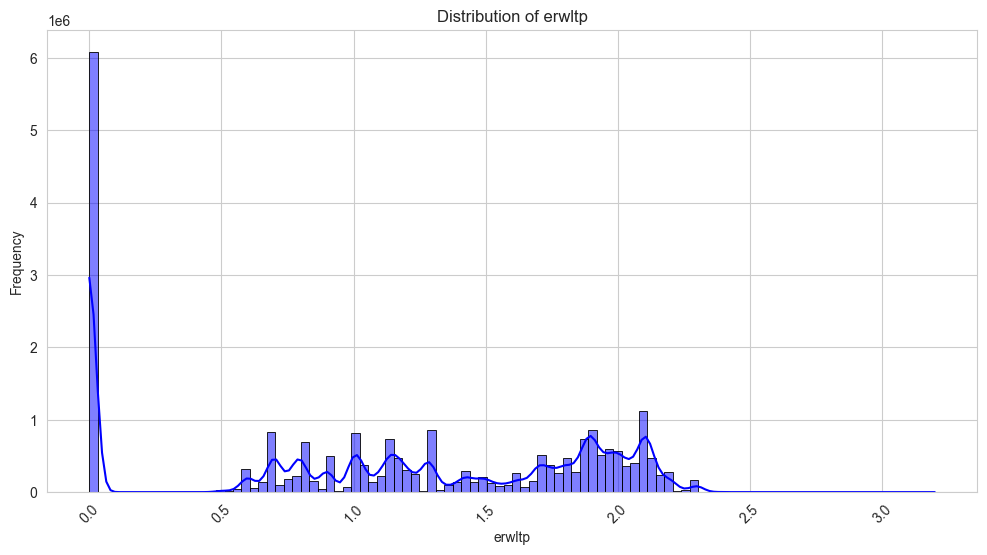

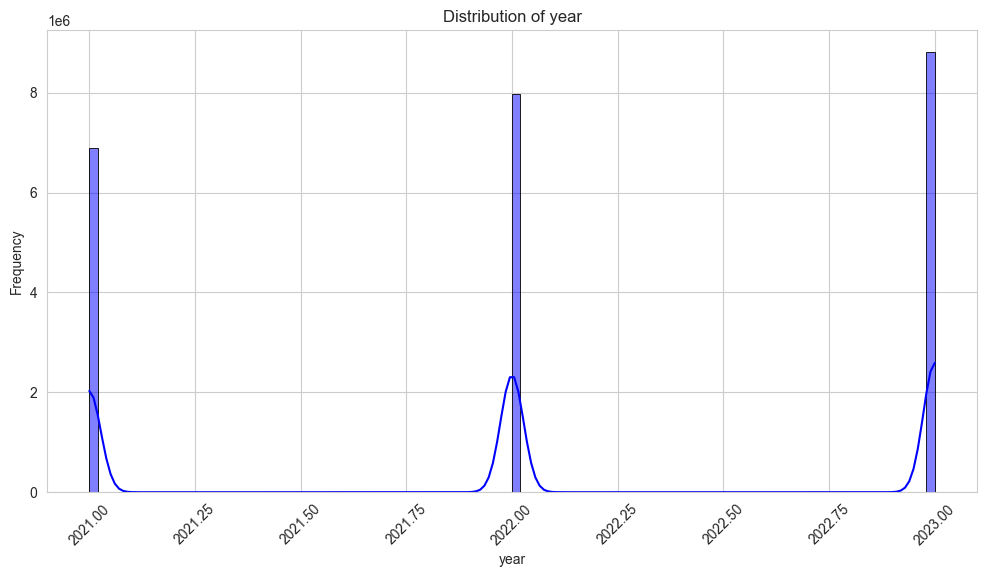

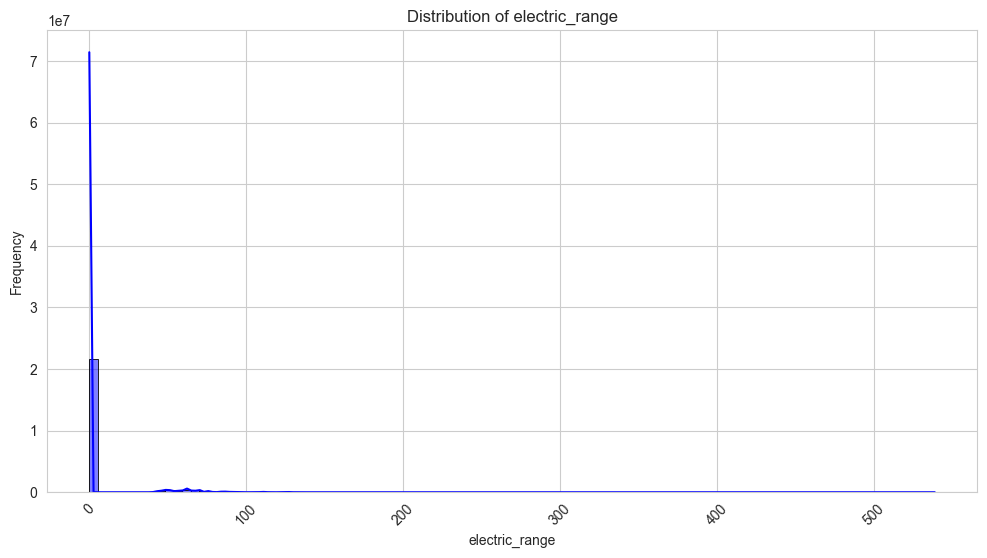

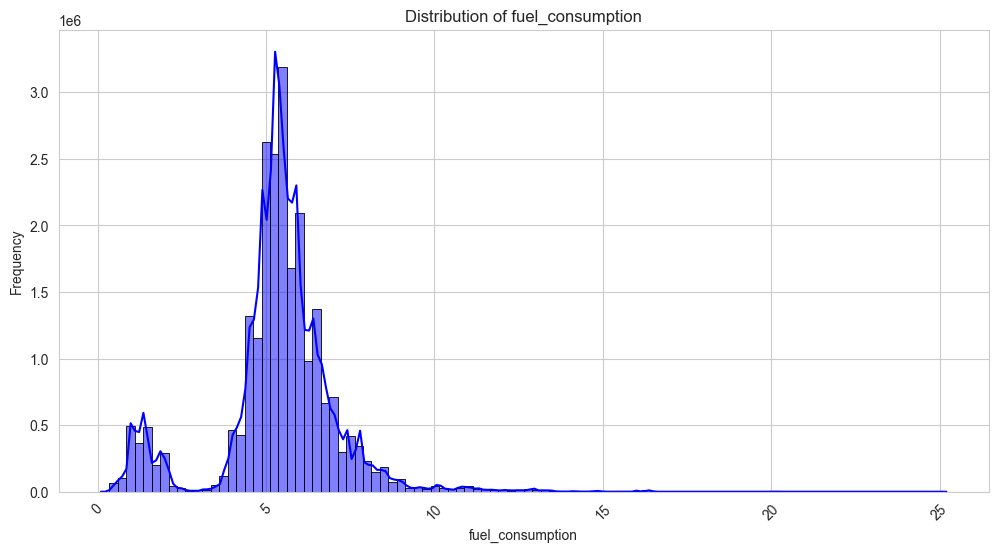

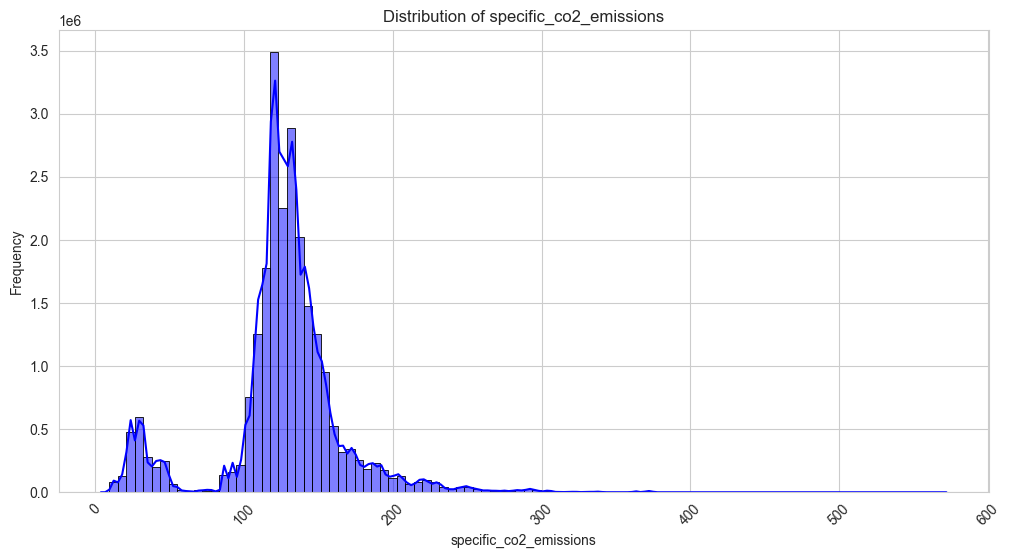

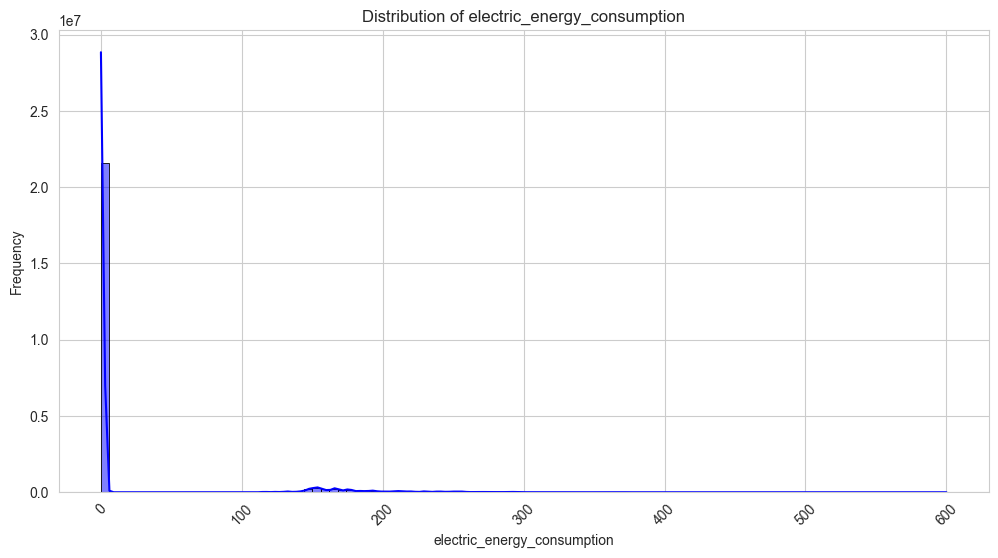

In [ ]:
# Distribution Analysis of Numerical Variables

sns.set_style("whitegrid")

# Iterate through numerical columns and plot each separately
for col in numerical_cols:
    plt.figure(figsize = (12, 6))
    sns.histplot(df[col], bins = 100, kde = True, color = "blue", edgecolor = "black")
    plt.xticks(rotation = 45)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

Pearson Correlation between mass_vehicle and weltp_test_mass: 0.9935 (p-value: 0.0000e+00)
Spearman Correlation between mass_vehicle and weltp_test_mass: 0.9947 (p-value: 0.0000e+00)


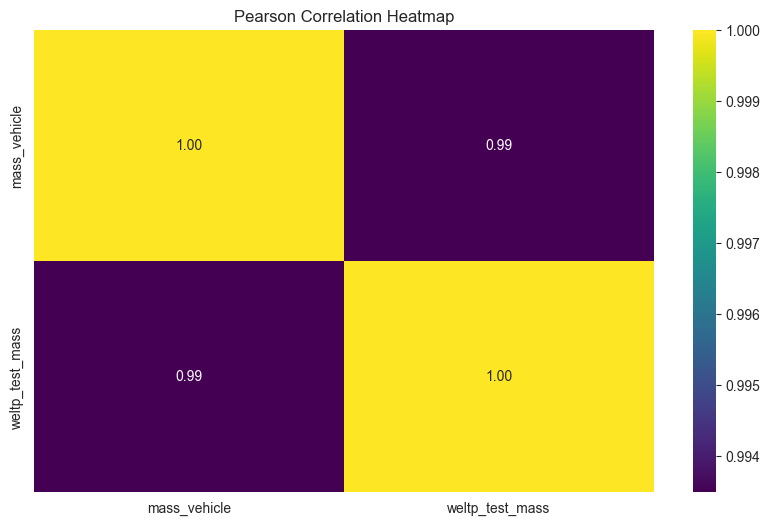

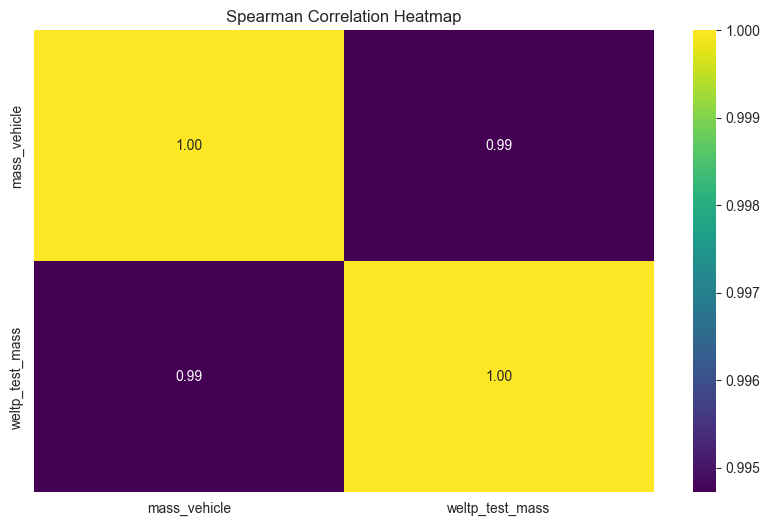

In [ ]:
# Comparing 'mass_vehicle' and 'wltp_test_mass' for Feature Selection

mass_variables = ["mass_vehicle", "weltp_test_mass"]

# Compute Pearson correlation
pearson_corr, pearson_p_value = stats.pearsonr(df[mass_variables[0]], df[mass_variables[1]])

# Compute Spearman correlation
spearman_corr, spearman_p_value = stats.spearmanr(df[mass_variables[0]], df[mass_variables[1]])

# Print results
print(f"Pearson Correlation between {mass_variables[0]} and {mass_variables[1]}: {pearson_corr:.4f} (p-value: {pearson_p_value:.4e})")
print(f"Spearman Correlation between {mass_variables[0]} and {mass_variables[1]}: {spearman_corr:.4f} (p-value: {spearman_p_value:.4e})")

# Heatmap to visualize correlation among all numerical variables
plt.figure(figsize = (10, 6))
sns.heatmap(df[mass_variables].corr(method = "pearson"), annot = True, cmap = "viridis", fmt = ".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

plt.figure(figsize = (10, 6))
sns.heatmap(df[mass_variables].corr(method = "spearman"), annot = True, cmap = "viridis", fmt = ".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()


> **The variables are redundant, and one must be removed**
>
> *Refining the Selection Between `'mass_vehicle'` and `'wltp_test_mass'`*

In [ ]:
# Descriptive Statistics for "mass_vehicle" and "wltp_test_mass"

df[["mass_vehicle", "weltp_test_mass"]].describe()

,mass_vehicle,weltp_test_mass
count,2.368710e+07,2.368710e+07
mean,1.466255e+03,1.589938e+03
std,3.177880e+02,3.424463e+02
min,5.700000e+02,6.150000e+02
25%,1.242000e+03,1.346000e+03
50%,1.411000e+03,1.527000e+03
75%,1.630000e+03,1.767000e+03
max,4.610000e+03,4.711000e+03


In [ ]:
# Correlation Analysis with Target Variable ("electric_energy_consumption")

corr_mass = df["mass_vehicle"].corr(df["electric_energy_consumption"])
corr_weltp = df["weltp_test_mass"].corr(df["electric_energy_consumption"])

print(f"Correlation with target:\nMass Vehicle: {corr_mass:.5f}\nWELTP Test Mass: {corr_weltp:.5f}")

Correlation with target:
Mass Vehicle: 0.51387
WELTP Test Mass: 0.49218


In [ ]:
# Predictive Power Evaluation Using Linear Regression (R² Score Comparison)

X_mass = df["mass_vehicle"].values.reshape(-1, 1)
X_weltp = df["weltp_test_mass"].values.reshape(-1, 1)
y = df["electric_energy_consumption"]

model_mass = LinearRegression().fit(X_mass, y)
model_weltp = LinearRegression().fit(X_weltp, y)

r2_mass = model_mass.score(X_mass, y)
r2_weltp = model_weltp.score(X_weltp, y)

print(f"R² Score:\nMass Vehicle: {r2_mass:.5f}\nWELTP Test Mass: {r2_weltp:.5f}")

R² Score:
Mass Vehicle: 0.26406
WELTP Test Mass: 0.24224


### Feature Selection: `mass_vehicle` vs. `weltp_test_mass`

After analyzing both variables, considering their distributions, descriptive statistics, and correlation with `electric_energy_consumption`, we decided to **keep `mass_vehicle` and remove `weltp_test_mass`**.

### Key Reasons for This Decision:
- `mass_vehicle` has a **higher correlation (0.51) with the target** than `weltp_test_mass` (0.49), making it a slightly better predictor.
- The distributions of both variables are similar, but `mass_vehicle` captures slightly more variance, which might provide better predictive power.
- While `weltp_test_mass` is likely a more standardized metric, the difference in correlation suggests that `mass_vehicle` is a marginally better fit for our model.

By keeping `mass_vehicle`, we ensure that we are using the variable with the strongest relationship to `electric_energy_consumption`, optimizing our feature selection process. 


In [ ]:
# Feature Selection: Dropping "wltp_test_mass"

df.drop(columns = ["weltp_test_mass"], inplace = True)

In [ ]:
# Updating Manipulated Datasets

# Splitting data into target and data sets, all features are categorical

target = df["electric_energy_consumption"]
data = df.drop(["electric_energy_consumption"], axis = 1)

# Identify categorical and numerical variables
categorical_cols = []
numerical_cols = []

for col in df.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

# Display categorized columns
print("\n📊 Numerical Variables:", numerical_cols)
print("\n🔠 Categorical Variables:", categorical_cols)


📊 Numerical Variables: ['mass_vehicle', 'engine_capacity', 'engine_power', 'erwltp', 'year', 'electric_range', 'fuel_consumption', 'specific_co2_emissions', 'electric_energy_consumption']

🔠 Categorical Variables: ['innovative_technologies', 'fuel_type', 'fuel_mode']


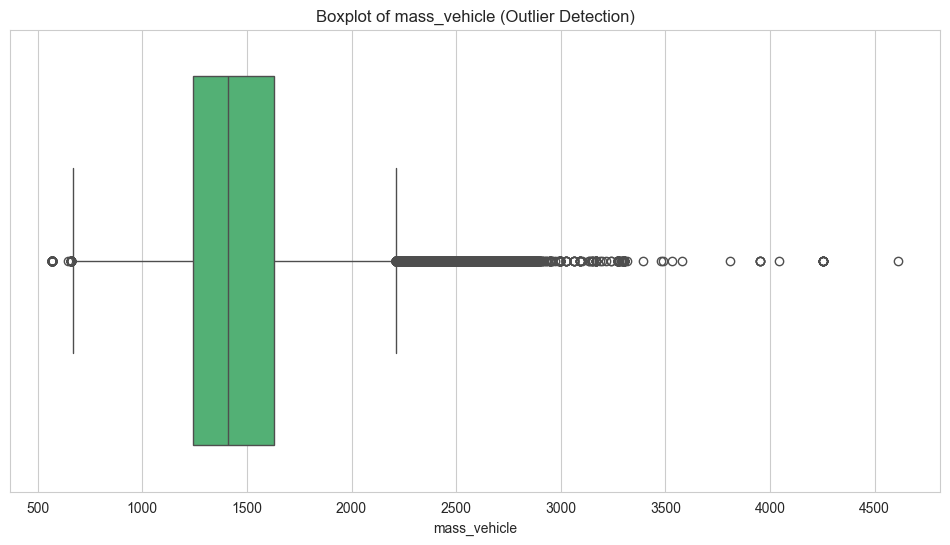

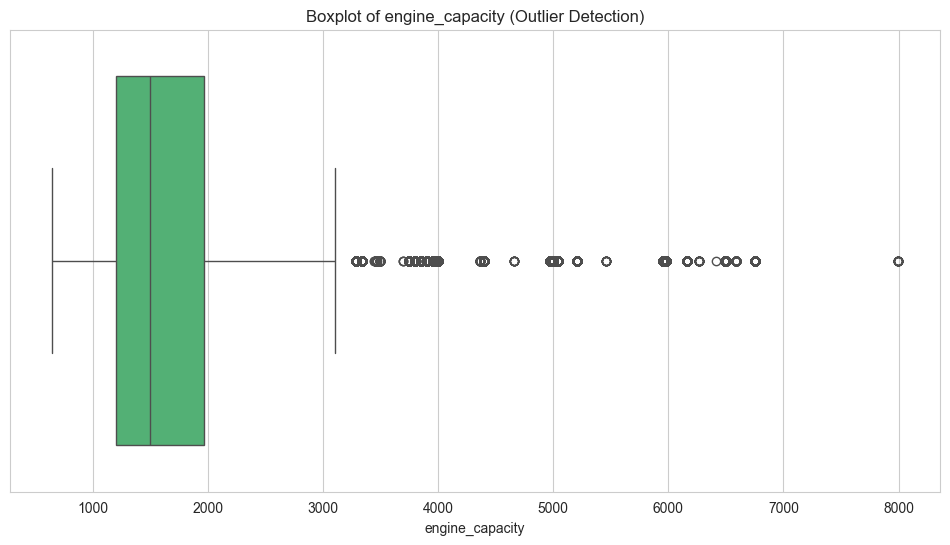

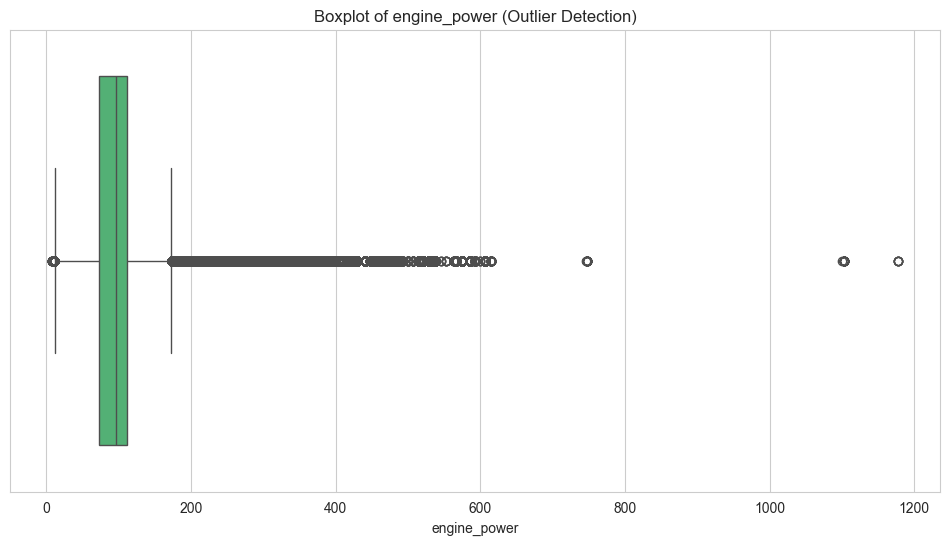

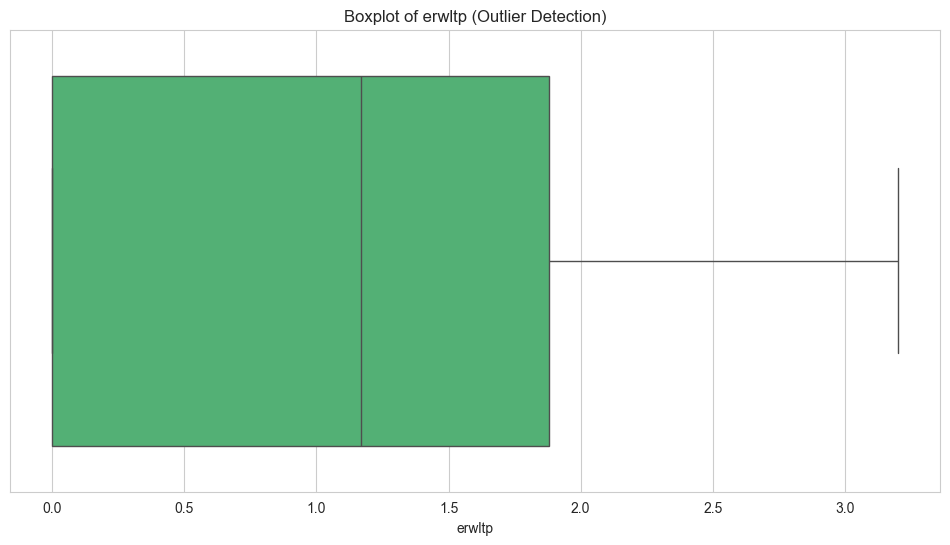

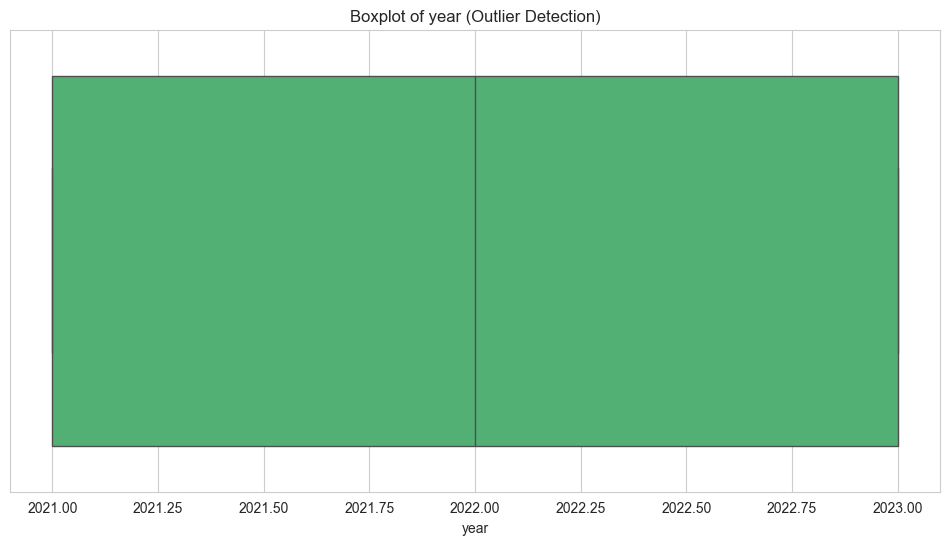

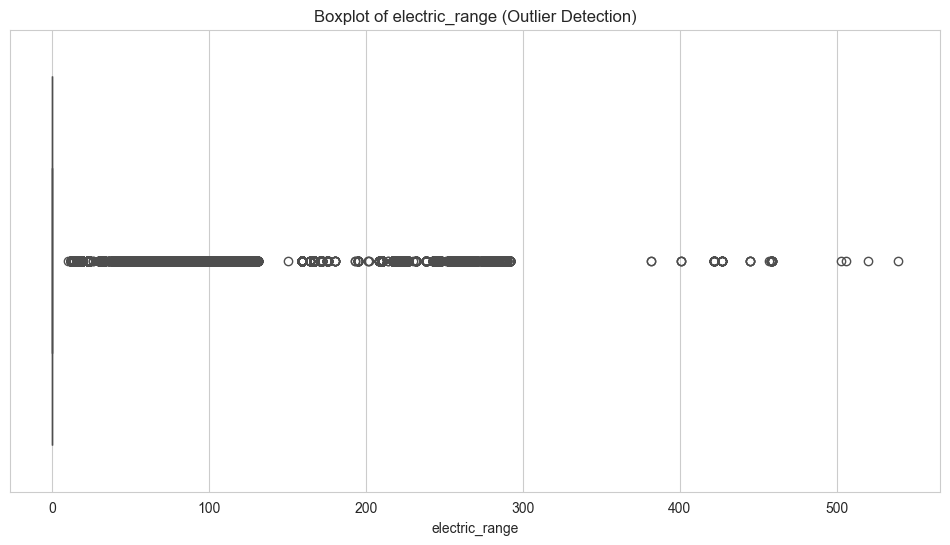

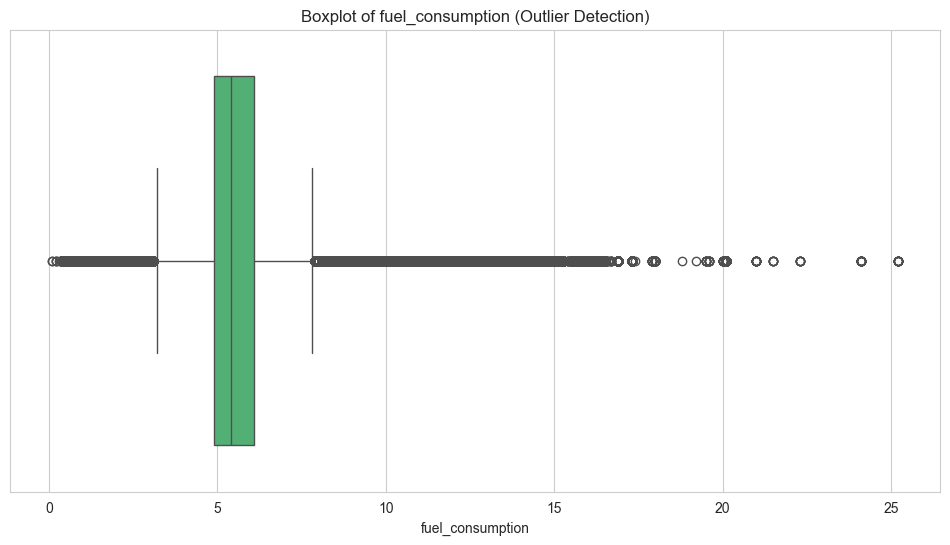

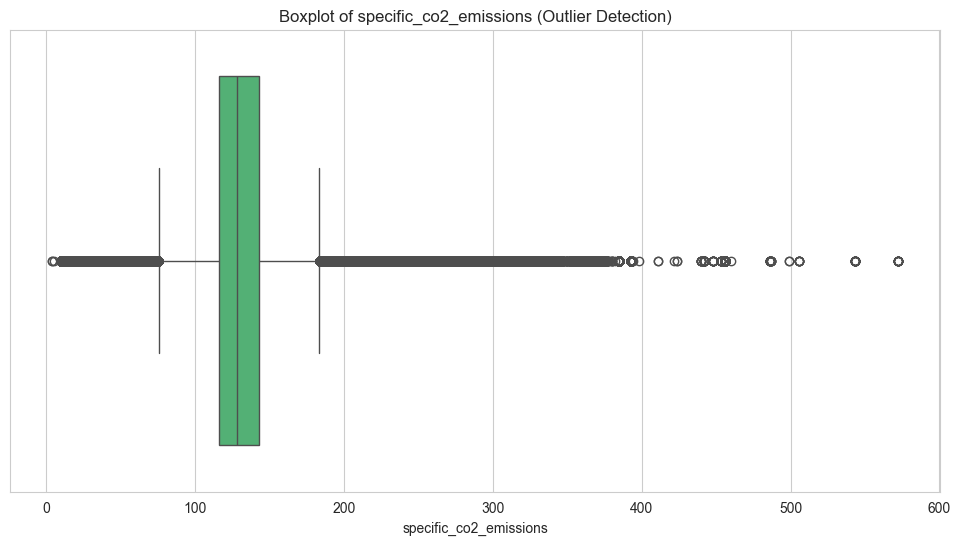

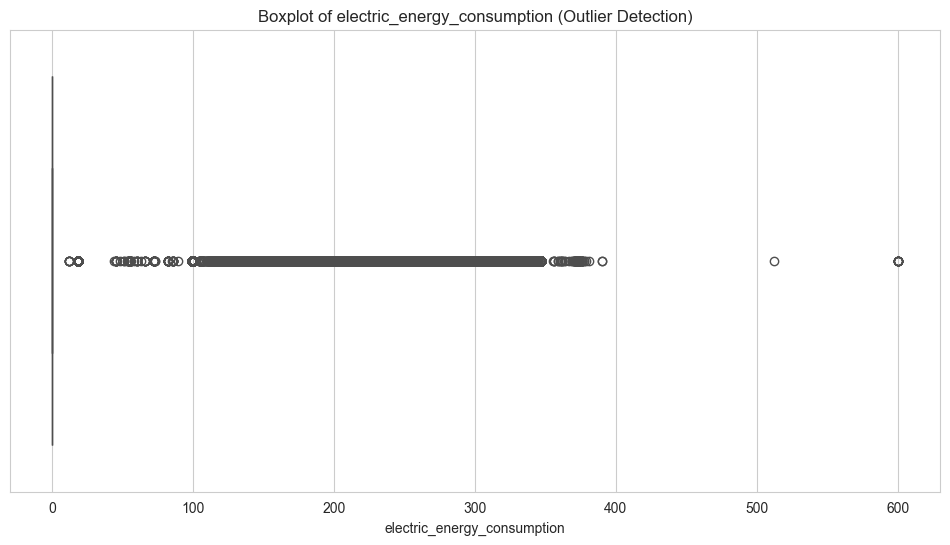

In [ ]:
# Outlier Detection and Analysis

sns.set_style("whitegrid")

# Iterate through numerical columns and plot boxplots separately
for col in numerical_cols:
    plt.figure(figsize = (12, 6))
    sns.boxplot(x = df[col], color = plt.cm.viridis(0.7))
    plt.xlabel(col)
    plt.title(f"Boxplot of {col} (Outlier Detection)")
    plt.show()

### Outliers Analysis
>
>Boxplots were used to detect outliers in numerical variables. The following observations were made:
>
>`mass_vehicle`: Several extreme values above 4000 kg, likely representing heavy-duty vehicles or misclassified entries.
>
>`engine_capacity` & `engine_power`: High-end vehicles display significantly higher values than the median, with a long tail of extreme cases.
>
>`electric_range`: Fully electric vehicles introduce a bimodal distribution, which causes some values to be flagged as outliers.
>
>`specific_co2_emissions` & `fuel_consumption`: A few extreme values suggest either measurement inconsistencies or specific vehicle categories with unusually high emissions.
>
>`wltp_test_mass`: The distribution appears consistent with mass_vehicle, but some extreme values might need further verification before exclusion.
>
>`electric_energy_consumption`: Some extreme values could indicate differences in efficiency across vehicle types, requiring further analysis.
>
>`year`: No significant outliers were detected, as expected from a categorical-like numerical variable.
>
>
>**These outliers will be addressed in the next notebook, where the final data preparation will take place before running the model. Handling strategies may include transformation, filtering, or creating separate categories for extreme values.**

In [ ]:
# Feature Correlation with Electric Energy Consumption

corr_with_target = df[numerical_cols].corrwith(df["electric_energy_consumption"])
print(corr_with_target.sort_values(ascending = False))

electric_energy_consumption    1.000000
electric_range                 0.909534
mass_vehicle                   0.513872
engine_power                   0.233092
engine_capacity                0.194041
year                           0.019882
erwltp                        -0.431747
fuel_consumption              -0.691881
specific_co2_emissions        -0.703090
dtype: float64


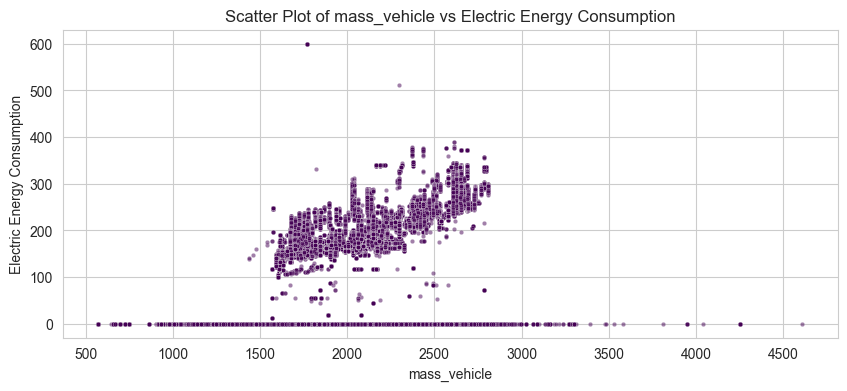

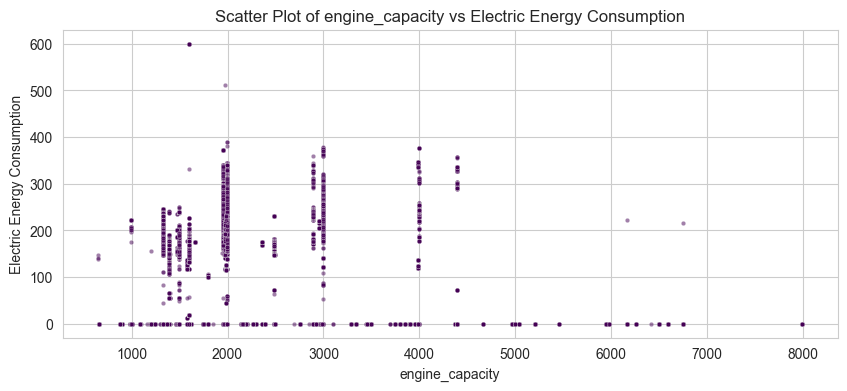

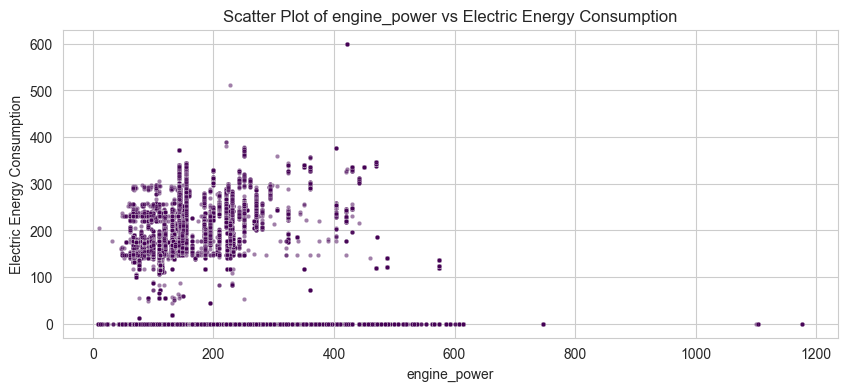

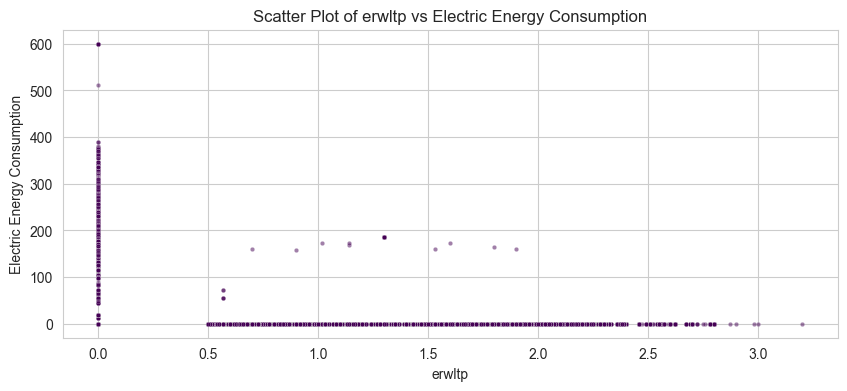

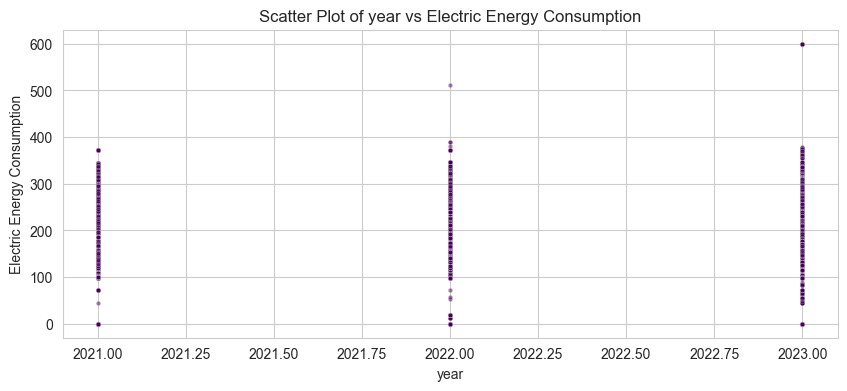

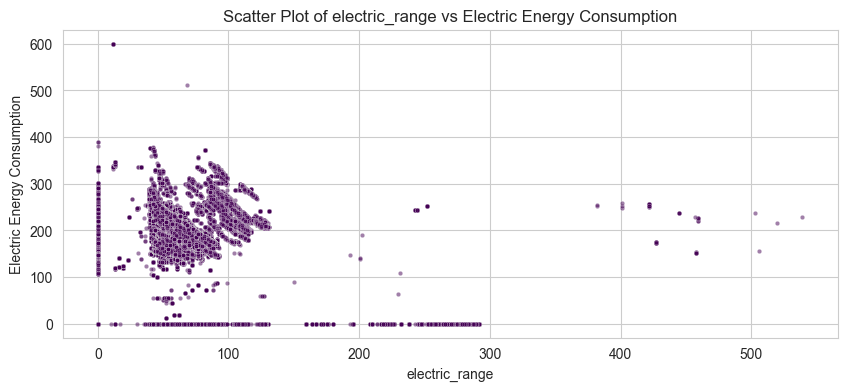

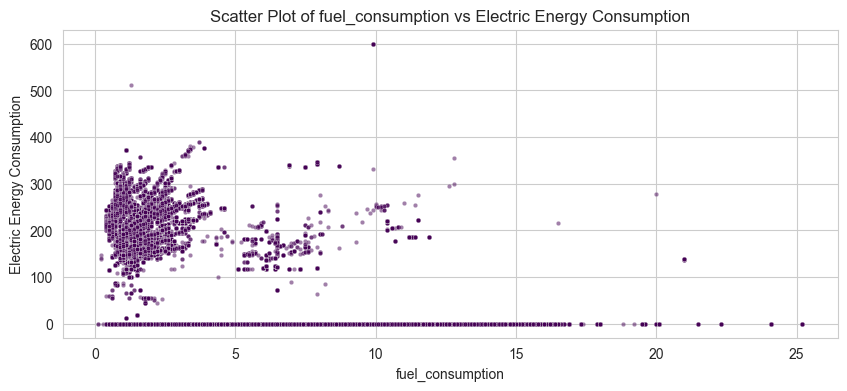

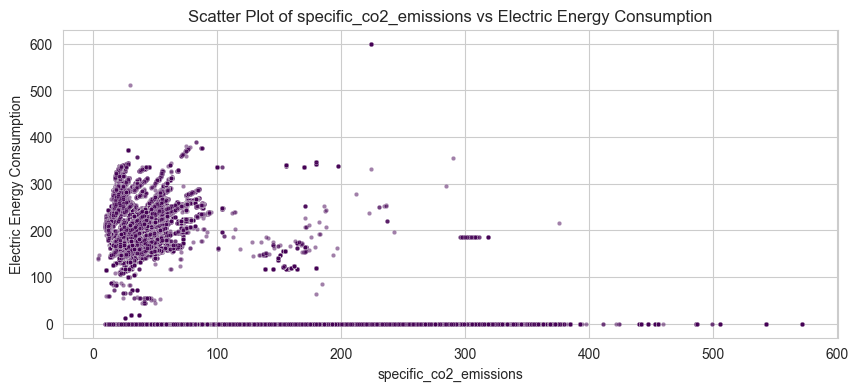

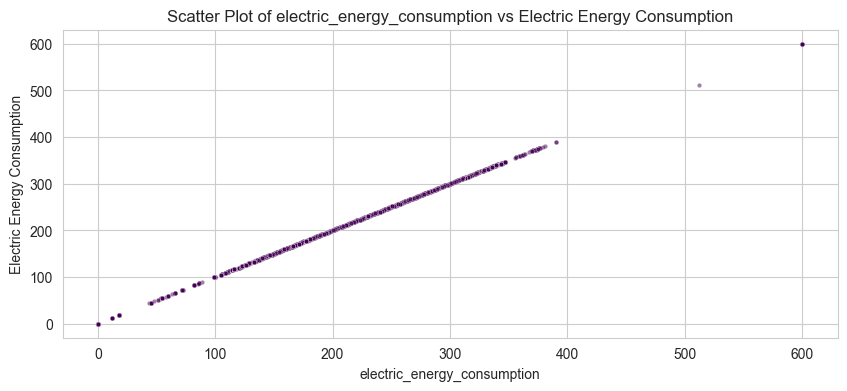

In [ ]:
# Analyzing Potential Linear Relationships Between Features and Electric Energy Consumption

# Set Seaborn style
sns.set_style("whitegrid")

# Iterate through numerical columns and plot scatter plots
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(x = df[col], y = df["electric_energy_consumption"],
                    alpha = 0.5,
                    color = "#440154",
                    s = 10)
    plt.xlabel(col)
    plt.ylabel("Electric Energy Consumption")
    plt.title(f"Scatter Plot of {col} vs Electric Energy Consumption")
    plt.show()

### Scatterplots for Linear Relationships  
> Scatterplots were examined to assess linearity between features and **electric energy consumption**. The following observations were made:  
>  
> `mass_vehicle`: A positive correlation is noticeable, suggesting this variable holds predictive value.  
>  
> `engine_power` & `engine_capacity`: These variables show some association with the target but with considerable dispersion, indicating potential non-linearity.  
>  
> `electric_range`: A clear inverse relationship with energy consumption, aligning with expectations for electric vehicles.  
>  
> `fuel_consumption` & `specific_co2_emissions`: Expected linear trends are observed, though some dispersion may indicate the need for additional transformations.  
>  
> `wltp_test_mass`: The relationship appears similar to `mass_vehicle`, reinforcing the redundancy seen in previous analyses.  
>  
> `year`: Displays a categorical-like distribution, confirming its limited direct predictive power in a linear regression setting.  
>  
> `electric_energy_consumption`: The perfect linearity is expected, serving as a reference check.  
>  
> **These relationships indicate that some variables may be directly usable in a linear model, while others might require transformations** (e.g., log transformations or polynomial terms).  
>  
> **Final adjustments will be performed in the next notebook, where the dataset will be prepared for model execution.**

Index(['mass_vehicle', 'engine_capacity', 'engine_power', 'erwltp', 'year',
       'electric_range', 'fuel_consumption', 'specific_co2_emissions',
       'electric_energy_consumption'],
      dtype='object')


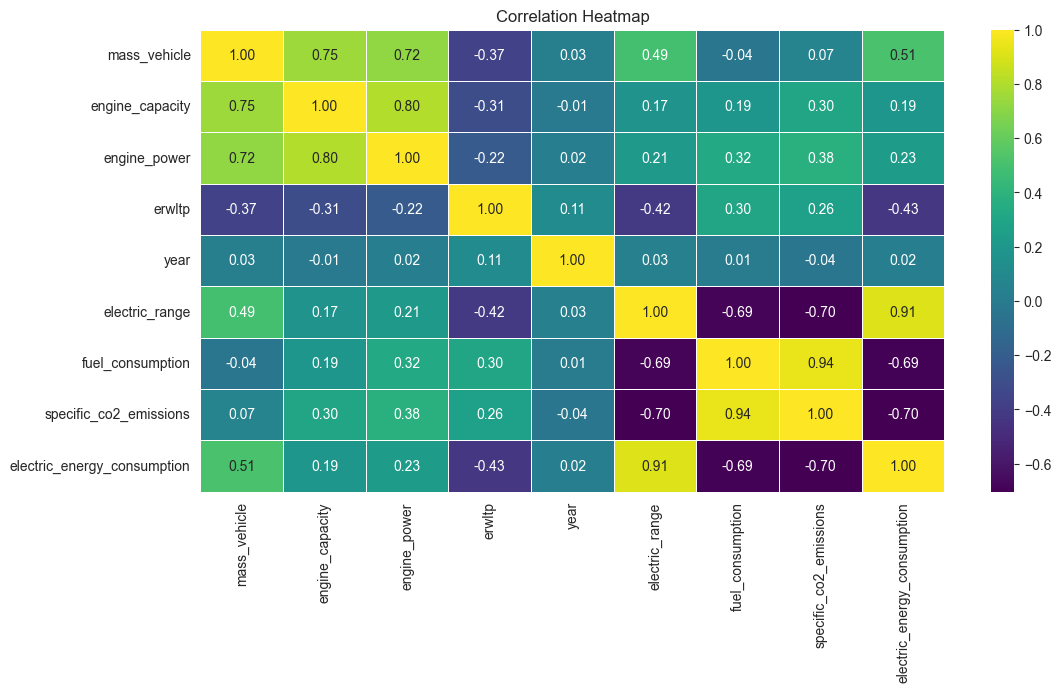

In [ ]:
# Calculate correlation matrix only for numerical variables
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize = (12, 6))
sns.heatmap(corr_matrix, annot = True, cmap = "viridis", fmt = ".2f", linewidths = 0.5)
plt.title("Correlation Heatmap")

# Confirm which numerical columns were used
print(df[numerical_cols].columns)


In [ ]:
# Ensure "numerical_cols" only contains columns that actually exist in "data"

numerical_cols = [col for col in numerical_cols if col in data.columns]

# Define chunk size to prevent memory overload
chunk_size = 50000
num_chunks = int(np.ceil(data.shape[0] / chunk_size))

# Initialize Random Forest model
model = RandomForestRegressor()

# Train the model in chunks
for i in range(num_chunks):
    start = i * chunk_size
    end = min((i + 1) * chunk_size, data.shape[0])
    model.fit(data[numerical_cols].iloc[start:end], target.iloc[start:end])
    print(f"Chunk {i+1}/{num_chunks} processed")

# Calculate feature importance
importance = model.feature_importances_

# Display results in sorted order
feature_importance = {col: importance[idx] for idx, col in enumerate(numerical_cols)}
print("Feature Importances:")
for feature, value in sorted(feature_importance.items(), key = lambda item: item[1], reverse = True):
    print(f"{feature}: {value:.5f}")


Chunk 1/474 processed
Chunk 2/474 processed
Chunk 3/474 processed
Chunk 4/474 processed
Chunk 5/474 processed
Chunk 6/474 processed
Chunk 7/474 processed
Chunk 8/474 processed
Chunk 9/474 processed
Chunk 10/474 processed
Chunk 11/474 processed
Chunk 12/474 processed
Chunk 13/474 processed
Chunk 14/474 processed
Chunk 15/474 processed
Chunk 16/474 processed
Chunk 17/474 processed
Chunk 18/474 processed
Chunk 19/474 processed
Chunk 20/474 processed
Chunk 21/474 processed
Chunk 22/474 processed
Chunk 23/474 processed
Chunk 24/474 processed
Chunk 25/474 processed
Chunk 26/474 processed
Chunk 27/474 processed
Chunk 28/474 processed
Chunk 29/474 processed
Chunk 30/474 processed
Chunk 31/474 processed
Chunk 32/474 processed
Chunk 33/474 processed
Chunk 34/474 processed
Chunk 35/474 processed
Chunk 36/474 processed
Chunk 37/474 processed
Chunk 38/474 processed
Chunk 39/474 processed
Chunk 40/474 processed
Chunk 41/474 processed
Chunk 42/474 processed
Chunk 43/474 processed
Chunk 44/474 process

> ## **Categorical Variables**

C:\Users\leone\AppData\Local\Temp\ipykernel_21248\855446555.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_values.index, y = top_values.values, palette = "mako")


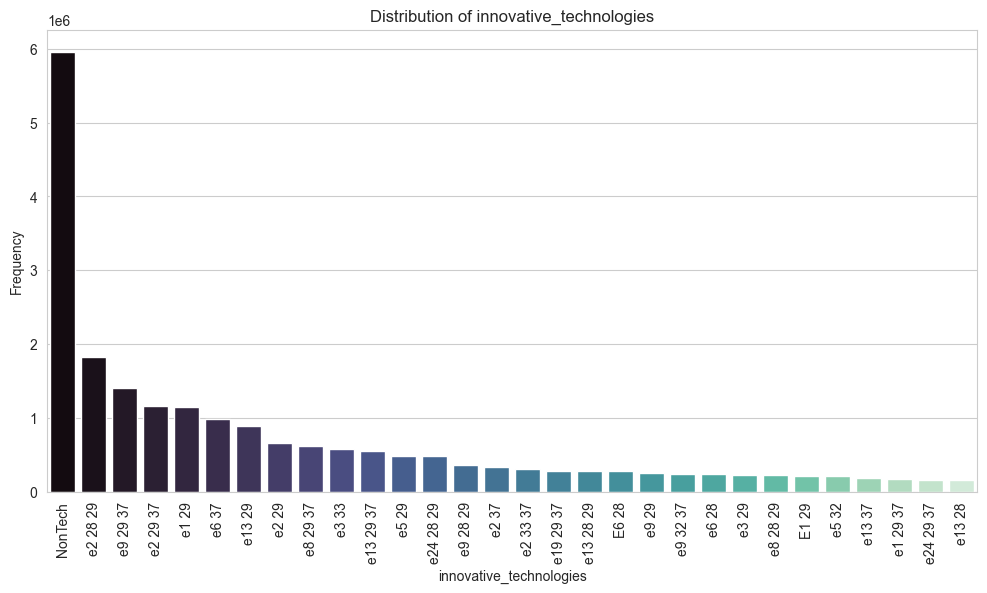

C:\Users\leone\AppData\Local\Temp\ipykernel_21248\855446555.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[col], palette = "viridis", order = df[col].value_counts().index)


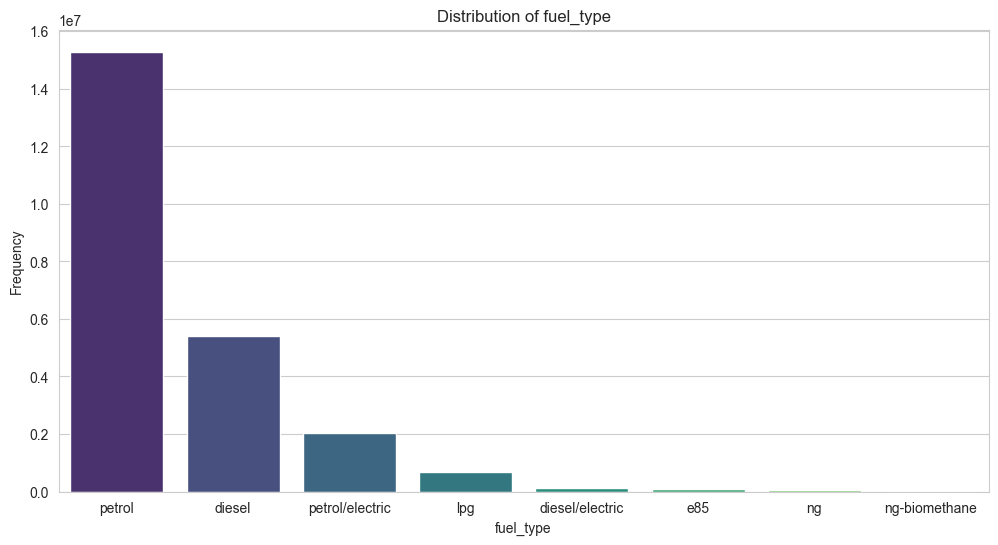

C:\Users\leone\AppData\Local\Temp\ipykernel_21248\855446555.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[col], palette = "viridis", order = df[col].value_counts().index)


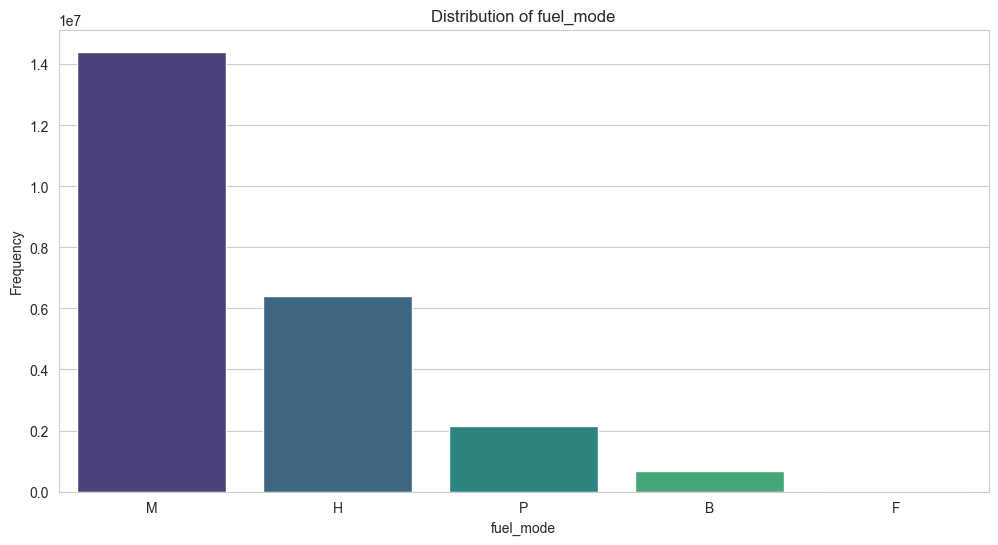

In [ ]:
# Distribution of the categorical variables

# Set plot style
sns.set_style("whitegrid")

# Define the threshold for unique values where countplot is feasible
threshold_countplot = 30

# Iterate through categorical columns
for col in categorical_cols:
    unique_count = df[col].nunique()

    plt.figure(figsize = (12, 6))

    if unique_count <= threshold_countplot:
        sns.countplot(x = df[col], palette = "viridis", order = df[col].value_counts().index)
        plt.xticks(rotation = 90 if unique_count > 10 else 0)

    else:
        top_values = df[col].value_counts().head(threshold_countplot)
        sns.barplot(x = top_values.index, y = top_values.values, palette = "mako")
        plt.xticks(rotation = 90)

    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()


In [ ]:
# Correlation Test to determines which varables to remove: fuel_mode or fuel_type

#  correlation between fuel mode and fuel type
# on why handle fuel mode in this way ("Description of Categorical Variable.txt")

# Function to calculate Cramér's V correlation between two categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Apply the function to `fuel_type` and `fuel_mode`
cramers_v_value = cramers_v(df["fuel_type"], df["fuel_mode"])

print(f"Correlation between `fuel_type` and `fuel_mode` (Cramér's V): {cramers_v_value:.4f}")

Correlation between `fuel_type` and `fuel_mode` (Cramér's V): 0.7557


### Feature Selection: `fuel_type` vs. `fuel_mode`

After analyzing both variables, considering their distributions, descriptive statistics, and correlation with each other, we decided to **keep `fuel_type` and remove `fuel_mode`**.

### Key Reasons for This Decision:
- The **Cramér's V correlation between `fuel_type` and `fuel_mode` is 0.7557**, indicating a strong association. Keeping both variables would introduce redundancy in the dataset.
- The **distribution of both variables is highly similar**, but `fuel_type` provides a clearer and better-distributed categorization.
- The **categories in `fuel_mode` lack meaningful descriptions**, making it difficult to interpret or validate their significance in the dataset. Without proper documentation, assumptions about their meaning could introduce inconsistencies.

By keeping `fuel_type`, we retain the variable that is **better structured and interpretable**, while avoiding unnecessary multicollinearity and ensuring a more robust feature selection process.


In [8]:
# Removing fuel_mode

df.drop(columns = ["fuel_mode"], inplace = True)

In [7]:
# Actualizing manupulative datasets

# Splitting data into target and data sets, all features are categorical

target = df["electric_energy_consumption"]
data = df.drop(["electric_energy_consumption"], axis = 1)

# Identify categorical and numerical variables
categorical_cols = []
numerical_cols = []

for col in df.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

# Display categorized columns
print("\n📊 Numerical Variables:", numerical_cols)
print("\n🔠 Categorical Variables:", categorical_cols)


📊 Numerical Variables: ['mass_vehicle', 'engine_capacity', 'engine_power', 'erwltp', 'year', 'electric_range', 'fuel_consumption', 'specific_co2_emissions', 'electric_energy_consumption', 'fuel_type_diesel/electric', 'fuel_type_e85', 'fuel_type_lpg', 'fuel_type_ng', 'fuel_type_petrol', 'fuel_type_petrol/electric']

🔠 Categorical Variables: ['innovative_technologies']


In [8]:
# Identifying Rare Categories in Categorical Variables

# Threshold to classify a category as rare (< 0.1% of total data)
threshold = 0.001

# Dictionary to store rare categories per column
rare_categories = {}

# Check for rare categories in categorical columns
for col in categorical_cols:
    category_counts = df[col].value_counts(normalize = True, dropna = False)
    rare_values = category_counts[category_counts < threshold]

    if not rare_values.empty:  # Only store columns that have rare categories
        rare_categories[col] = rare_values.index.tolist()

        print(f"🔍 Rare categories for '{col}' (Total unique: {df[col].nunique()}, Rare: {len(rare_values)})")
        print(rare_values.to_string())
        print("-" * 80)

# Display summary of rare categories found
if rare_categories:
    print("\n✅ Rare categories identified in the dataset:")
    for col, rare_vals in rare_categories.items():
        print(f"  - {col}: {rare_vals}")
else:
    print("\n✅ No rare categories found in categorical variables.")


🔍 Rare categories for 'innovative_technologies' (Total unique: 232, Rare: 165)
innovative_technologies
e5 28 e9 32       9.809695e-04
E9 32 37          9.074981e-04
e4 29 e4 37       8.963085e-04
e3 32             8.507900e-04
e8 28             8.142232e-04
e9 32             7.779943e-04
e5 29 37          7.718294e-04
e5 29 28          7.351360e-04
e3 37 32          6.282224e-04
E6 37             6.275046e-04
e1 33             5.891222e-04
E9 37             5.675452e-04
e4 29 37          5.650962e-04
E3 33             5.581291e-04
e9 28             5.572423e-04
e9 29             5.326674e-04
E2 29             4.679366e-04
e5 32 37          4.568737e-04
e5 32 e4 37       4.508355e-04
E5 32             3.666813e-04
e2 29 28          3.638944e-04
E13 28 29         3.459066e-04
E2 37             3.319724e-04
e4 29             3.037661e-04
e2 32 37          2.954056e-04
e2 28 33          2.941388e-04
e4 29 28          2.908031e-04
e3 28 32 37       2.888185e-04
e9 3729           2.834559e-0

In [24]:
# Evaluating the Relationship Between Categorical Variables and the Target Variable (Significance)

for col in categorical_cols:
    unique_values = data[col].nunique()

    if unique_values < 2:
        print(f"Skipping '{col}': Only one category present.")
        continue

    print(f"🔍 Running ANOVA for '{col}' (Unique values: {unique_values})")

    # Remove NaN values from both data and target
    df_filtered = data[[col]].copy()
    df_filtered["target"] = target
    df_filtered = df_filtered.dropna()

    # Create groups based on unique values of the categorical variable
    groups = [df_filtered["target"][df_filtered[col] == cat] for cat in df_filtered[col].unique()]

    # Ensure all groups have at least two samples
    valid_groups = [group for group in groups if len(group) > 1]

    if len(valid_groups) < 2:
        print(f"⚠️ Skipping '{col}': Not enough data for ANOVA test (some categories have only one sample).")
        continue

    # Perform ANOVA test
    f_stat, p_value = stats.f_oneway(*valid_groups)

    # Display result
    print(f"📊 {col}: ANOVA p-value = {p_value:.5f}")

    # Interpretation
    if p_value < 0.05:
        print(f"✅ '{col}' has a **significant relationship** with the target variable (p < 0.05).")
    else:
        print(f"❌ '{col}' has **no significant relationship** with the target variable (p >= 0.05) and might be removed.")

    print("-" * 80)


🔍 Running ANOVA for 'innovative_technologies' (Unique values: 232)
📊 innovative_technologies: ANOVA p-value = 0.00000
✅ 'innovative_technologies' has a **significant relationship** with the target variable (p < 0.05).
--------------------------------------------------------------------------------
🔍 Running ANOVA for 'fuel_type' (Unique values: 8)
📊 fuel_type: ANOVA p-value = 0.00000
✅ 'fuel_type' has a **significant relationship** with the target variable (p < 0.05).
--------------------------------------------------------------------------------


In [ ]:
# Remove rare category if present in rare_categories dictionary
if "fuel_type" in rare_categories:
    rare_value_to_remove = rare_categories["fuel_type"]
    df = df[~df["fuel_type"].isin(rare_value_to_remove)]

# Store original index
df_index = df.index

# Apply One-Hot Encoding for 'fuel_type'
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)
fuel_encoded = one_hot_encoder.fit_transform(df[["fuel_type"]])

# Convert to dataframe and merge back into df
fuel_encoded_df = pd.DataFrame(fuel_encoded, columns=one_hot_encoder.get_feature_names_out(["fuel_type"]), index = df_index)
df = df.drop(columns=["fuel_type"])
df = df.join(fuel_encoded_df)

# ✅ Check final transformation
print(df.head())


          mass_vehicle  engine_capacity  engine_power  erwltp  year  \
ID                                                                    
56003309        1710.0           2487.0         131.0     0.0  2021   
56003313        1710.0           2487.0         131.0     0.0  2021   
56003314        1710.0           2487.0         131.0     0.0  2021   
56003351        1635.0           1987.0         129.0     0.0  2021   
56003352        1635.0           1987.0         129.0     0.0  2021   

          electric_range  fuel_consumption  specific_co2_emissions  \
ID                                                                   
56003309             0.0               5.7                   128.0   
56003313             0.0               5.7                   128.0   
56003314             0.0               5.7                   128.0   
56003351             0.0               7.1                   160.0   
56003352             0.0               7.1                   160.0   

         in

In [5]:
df = pd.read_csv("preprocessing_for_prediction_after_one_hot_encoder.csv", index_col = 0, sep = ",")

In [6]:
df.head()

,mass_vehicle,engine_capacity,engine_power,erwltp,year,electric_range,fuel_consumption,specific_co2_emissions,innovative_technologies,electric_energy_consumption,fuel_type_diesel/electric,fuel_type_e85,fuel_type_lpg,fuel_type_ng,fuel_type_petrol,fuel_type_petrol/electric
ID,,,,,,,,,,,,,,,,
56003309,1710.0,2487.0,131.0,0.0,2021,0.0,5.7,128.0,NonTech,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56003313,1710.0,2487.0,131.0,0.0,2021,0.0,5.7,128.0,NonTech,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56003314,1710.0,2487.0,131.0,0.0,2021,0.0,5.7,128.0,NonTech,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56003351,1635.0,1987.0,129.0,0.0,2021,0.0,7.1,160.0,NonTech,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56003352,1635.0,1987.0,129.0,0.0,2021,0.0,7.1,160.0,NonTech,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:

# 1️⃣ Define chunk size to prevent memory overload
CHUNK_SIZE = 10_000

# 2️⃣ Store original index to ensure it remains unchanged
original_index = df.index

# 3️⃣ Replace 'non-tech' with None (keep it as missing for `has_innovation`)
df.loc[df["innovative_technologies"] == "NonTech", "innovative_technologies"] = None

# 4️⃣ Replace rare categories with "other" (ensuring dictionary access is correct)
if "innovative_technologies" in rare_categories:
    df["innovative_technologies"] = df["innovative_technologies"].replace(
        rare_categories["innovative_technologies"], "other"
    )

# 5️⃣ Create a binary variable 'has_innovation' (1 = innovation present, 0 = no innovation)
df["has_innovation"] = df["innovative_technologies"].notnull().astype(int)

# 6️⃣ Initialize Hashing Encoder
hash_encoder = HashingEncoder(n_components=8)

# 7️⃣ Process Hash Encoding in chunks (Ignoring NaNs during encoding)
chunk_list = []  # Store processed chunks
num_chunks = (len(df) // CHUNK_SIZE) + 1  # Determine the number of chunks

for i in range(num_chunks):
    chunk = df.iloc[i * CHUNK_SIZE: (i + 1) * CHUNK_SIZE]

    # 🔹 Only process rows where `has_innovation == 1` (ignoring NaNs)
    chunk_to_encode = chunk.loc[chunk["has_innovation"] == 1, ["innovative_technologies"]].dropna().copy()

    if not chunk_to_encode.empty:
        chunk_encoded = hash_encoder.fit_transform(chunk_to_encode)
        chunk_encoded.index = chunk_to_encode.index  # Preserve original index
        chunk_list.append(chunk_encoded)

# 8️⃣ Concatenate all processed chunks while preserving the index
df_hash_encoded = pd.concat(chunk_list)

# 9️⃣ Remove the original categorical column and merge encoded features into df while preserving index
df = df.drop(columns = ["innovative_technologies"])

# 🔹 Ensure missing indexes are filled with NaN (to align with original DataFrame structure)
df = df.join(df_hash_encoded, how="left")

# 🔹 Replace NaN in encoded columns with 0 (ensuring compatibility with Gradient Boosting)
df[df_hash_encoded.columns] = df[df_hash_encoded.columns].fillna(0)

# 🔹 Restore original index to ensure full alignment
df = df.loc[original_index]

# ✅ Final Check
print(df.head())


          mass_vehicle  engine_capacity  engine_power  erwltp  year  \
ID                                                                    
56003309        1710.0           2487.0         131.0     0.0  2021   
56003313        1710.0           2487.0         131.0     0.0  2021   
56003314        1710.0           2487.0         131.0     0.0  2021   
56003351        1635.0           1987.0         129.0     0.0  2021   
56003352        1635.0           1987.0         129.0     0.0  2021   

          electric_range  fuel_consumption  specific_co2_emissions  \
ID                                                                   
56003309             0.0               5.7                   128.0   
56003313             0.0               5.7                   128.0   
56003314             0.0               5.7                   128.0   
56003351             0.0               7.1                   160.0   
56003352             0.0               7.1                   160.0   

          e

In [10]:
df.to_csv("gradient_boosting_regressor.csv", index = True, sep = ",")